In [90]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import PIL.Image
from scipy.misc import imresize

In [45]:
img_dir = '../../../../../../../Data/VOCdevkit/VOC2012/JPEGImages/'

In [46]:
def select_one_pkl_from(d):
    files=[file for file in os.listdir(d) if 'pkl' in file]
    
    return files[np.random.randint(0,len(files))]

In [149]:
def random_display_one(d):
    with open(select_one_pkl_from(d),'rb') as f:
        img_name,img_labels,aggregation, class_response_maps, whole_pickle_list_in_target_class,valid_peak_list, peak_response_maps=pickle.load(f)
    
    df=pd.DataFrame(columns=['dog', 'sofa', 'bicycle', 'aeroplane', 'pottedplant', 'car', 'horse', 'bird', 'bottle', 'cow', 'cat',
            'tvmonitor', 'person', 'train', 'boat', 'diningtable', 'sheep', 'chair', 'motorbike', 'bus'])
    
    print('img_name:'+img_name)
    df.loc['labels']=img_labels
    df.loc['results']=np.array([1. if x>0 else 0. for x in aggregation])
    df.loc['score']=aggregation
    print('-------------------------------')
    print(df)
    print('-------------------------------')
    plt.figure()
    plt.imshow(PIL.Image.open(img_dir+img_name+'.jpg').convert('RGB'))
    
    target_label_nums=len(np.where(img_labels>0)[0])
    plt.figure(figsize=(10,8))
    for index,i in enumerate(np.where(img_labels>0)[0]):
        pd.DataFrame(class_response_maps[i]).to_csv('response_map_'+df.columns[i]+'.csv')
        tmp=plt.subplot('1'+str(target_label_nums)+str(index+1))
        plt.imshow(class_response_maps[i])
        tmp.set_title(df.columns[i])
        
    plt.figure(figsize=(10,3))
    for index,i in enumerate(np.where(img_labels>0)[0]):
        tmp=plt.subplot('1'+str(target_label_nums)+str(index+1))
        plt.scatter([x[3] for x in whole_pickle_list_in_target_class if x[1]==i],[x[2] for x in whole_pickle_list_in_target_class if x[1]==i])
        plt.xlim(0, 112)
        plt.ylim(0, 112)
        tmp.invert_yaxis()
        
    plt.figure(figsize=(10,3))
    for index,i in enumerate(np.where(img_labels>0)[0]):
        tmp=plt.subplot('1'+str(target_label_nums)+str(index+1))
        plt.scatter([x[3] for x in valid_peak_list if x[1]==i],[x[2] for x in valid_peak_list if x[1]==i])
        plt.xlim(0, 112)
        plt.ylim(0, 112)
        tmp.invert_yaxis()
        
    plt.figure(figsize=(20,5))
    peak_map_nums=len(peak_response_maps)
    for i in range(peak_response_maps.shape[0]):
        tmp=plt.subplot('1'+str(peak_map_nums)+str(i+1))
        plt.imshow(peak_response_maps[i])
        tmp.set_title(df.columns[valid_peak_list[i][1]])
    

In [160]:
random_display_one('./')

ValueError: low >= high

In [157]:
data_csv=pd.read_csv('../../../improved_data.csv')

In [159]:
data_csv.head()

,img_name,img_class,img_bbox,seg_class,seg_obj,bbox_label
0,2010_004157,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[['499', '1', '293', '19']]",NaN,NaN,['cat']
1,2012_003811,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[['56', '11', '277', '151']]",NaN,NaN,['person']
2,2007_007048,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...","[['227', '55', '500', '324'], ['82', '56', '24...",1.0,1.0,"['sheep', 'sheep', 'bottle', 'person', 'person..."
3,2012_001460,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[['230', '142', '229', '53']]",NaN,NaN,['person']
4,2008_006392,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[['1', '228', '95', '343'], ['77', '198', '101...",NaN,NaN,"['car', 'person', 'person', 'person', 'person']"


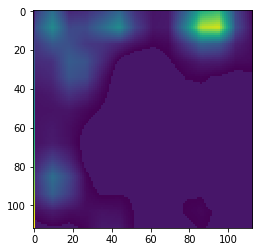

In [123]:
plt.imshow((response_person.values>np.median(response_person.values))*response_person.values)